### TUM halfsphere 

-----OBJECT DB----- 
params used:  
REG_T = 0.03  
MOVE_T = 0.5  
M2DP_VOX_SIZE = 0.01  
1 - person - detected 85 DYNAMIC segments  
0 - BG detected 154 segments  
61 - dining table detected 11 segments  
57 - chair detected 23 segments  
37 - skateboard detected 1 segments  
67 - keyboard detected 6 segments  
63 - tv detected 31 segments  
73 - refrigerator detected 11 segments  
74 - book detected 9 segments  
42 - cup detected 1 segments  
27 - handbag detected 1 segments  
64 - laptop detected 4 segments  
29 - suitcase detected 1 segments  
69 - microwave detected 1 segments  
7 - train detected 1 segments  
46 - bowl detected 1 segments  
total registration time: 3.812516689300537  
total descriptors calculation time: 240.24743270874023  
desc. calculation time avg: 0.0869831400104056 max: 0.782294511795044 min: 0.016089200973510742  
total movements: 2213  
movement avg: 1.2854814910414096 max: 4.954318051876423 min: 0.009993453235942732  

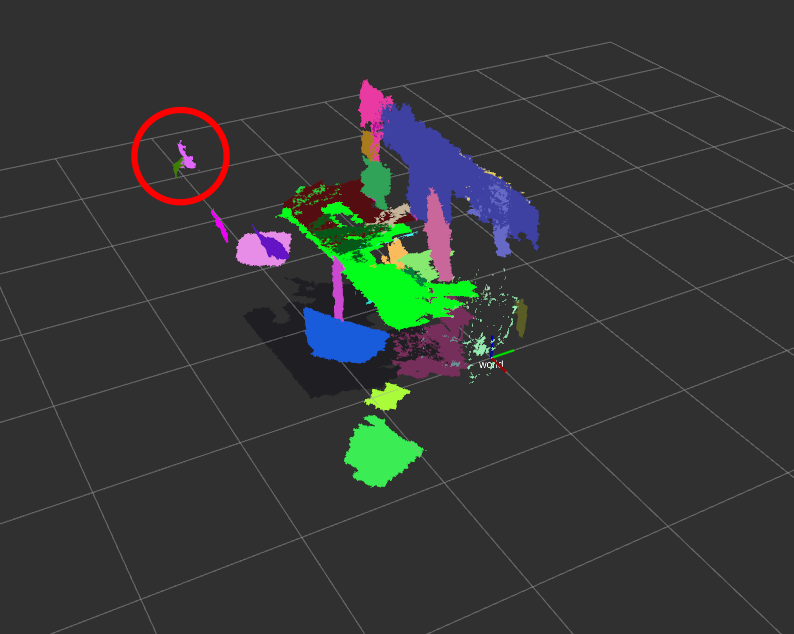  
2 tiny dynamic - person segments

## TUM halfsphere no dynamic classes 

-----OBJECT DB-----  
params used:  
REG_T = 0.03  
MOVE_T = 0.5  
M2DP_VOX_SIZE = 0.01  
1 - person detected 104 segments  
0 - BG detected 137 segments  
61 - dining table detected 13 segments  
63 - tv detected 33 segments  
27 - handbag detected 2 segments  
57 - chair detected 22 segments  
73 - refrigerator detected 8 segments  
64 - laptop detected 4 segments  
74 - book detected 6 segments  
67 - keyboard detected 5 segments  
29 - suitcase detected 1 segments  
69 - microwave detected 2 segments  
70 - oven detected 3 segments  
total registration time: 3.6506712436676025  
total descriptors calculation time: 258.86678433418274  
desc. calculation time avg: 0.09311754832164847 max: 0.8820638656616211 min:   0.01795506477355957  
total movements: 2440  
movement avg: 1.2599668293892274 max: 5.128967817277732 min:   0.014903383610936492  
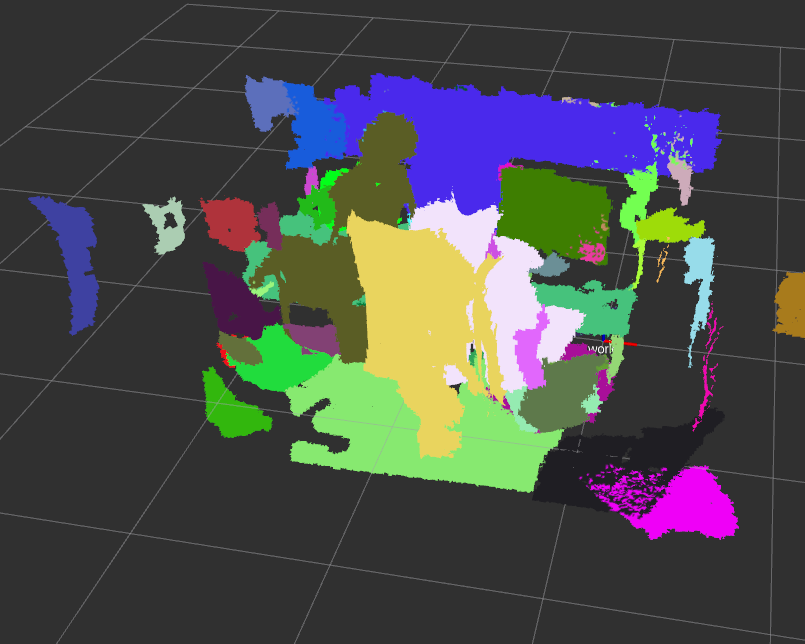

-----OBJECT DB-----  
params used:  
REG_T = 0.03  
MOVE_T = 0.5  
M2DP_VOX_SIZE = 0.01  
0 - BG detected 80 segments  
1 - person - detected 40 DYNAMIC segments  
57 - chair detected 9 segments  
63 - tv detected 23 segments  
61 - dining table detected 18 segments  
67 - keyboard detected 1 segments  
64 - laptop detected 3 segments  
72 - sink detected 1 segments  
15 - bird detected 1 segments  
70 - oven detected 3 segments  
74 - book detected 1 segments  
total registration time: 1.2992451190948486  
total descriptors calculation time: 122.24433636665344  
desc. calculation time avg: 0.13477876115397291 max: 1.5668623447418213 min: 0.023082494735717773  
total movements: 687  
movement avg: 1.3731034689140478 max: 4.241242377072475 min: 0.14932636793678838  


In [3]:
# examples/Python/Advanced/non_blocking_visualization.py

import open3d as o3d
import numpy as np
import copy

if __name__ == "__main__":
    o3d.utility.set_verbosity_level(o3d.utility.VerbosityLevel.Debug)
    source_raw = o3d.io.read_point_cloud("data/bunny/data/bun000.ply")
    target_raw = o3d.io.read_point_cloud("data/bunny/data/bun045.ply")
    source = source_raw.voxel_down_sample(voxel_size=0.02)
    target = target_raw.voxel_down_sample(voxel_size=0.02)
    trans = [[0.862, 0.011, -0.507, 0.0], [-0.139, 0.967, -0.215, 0.7],
             [0.487, 0.255, 0.835, -1.4], [0.0, 0.0, 0.0, 1.0]]
    source.transform(trans)
    print(type(source))
    flip_transform = [[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]]
    source.transform(flip_transform)
    target.transform(flip_transform)

    vis = o3d.visualization.Visualizer()
    vis.create_window()
    vis.add_geometry(source)
    vis.add_geometry(target)
    threshold = 0.05
    icp_iteration = 100
    save_image = False

    for i in range(1000):
        R = source.get_rotation_matrix_from_xyz(((0, np.pi / 2, np.pi / 4)))
        source.rotate(R, center=(0, 0, 0))
        vis.update_geometry(source)
        vis.poll_events()
        vis.update_renderer()
    vis.destroy_window()

[Open3D DEBUG] Format auto File data/bunny/data/bun000.ply
[Open3D DEBUG] Read geometry::PointCloud: 40256 vertices.
[Open3D DEBUG] [RemoveNonFinitePoints] 0 nan points have been removed.
[Open3D DEBUG] Format auto File data/bunny/data/bun045.ply
[Open3D DEBUG] Read geometry::PointCloud: 40097 vertices.
[Open3D DEBUG] [RemoveNonFinitePoints] 0 nan points have been removed.
[Open3D DEBUG] Pointcloud down sampled from 40256 points to 113 points.
[Open3D DEBUG] Pointcloud down sampled from 40097 points to 114 points.
<class 'open3d.cuda.pybind.geometry.PointCloud'>
[Open3D DEBUG] GLFW init.
[Open3D DEBUG] Add geometry and update bounding box to [(-0.0981, -0.8940, 1.3267) - (0.0404, -0.7291, 1.4326)]
[Open3D DEBUG] Add geometry and update bounding box to [(-0.0981, -0.8940, -0.0916) - (0.0785, -0.0391, 1.4326)]
[Open3D DEBUG] Global colormap init.


In [4]:
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector([[0,0,0]])
type(pcd)

open3d.cuda.pybind.geometry.PointCloud